In [29]:
#Creating CNN from scratch & transfer learning
#import the libraries
from tensorflow.keras.layers import Input,Lambda, Dense, Flatten, Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [30]:
#resize all the images to below size
IMAZE_SIZE= [224,224]
train_path= 'Dataset\Train'
valid_path='Dataset\Test'


In [31]:
#Imported the VGG19 Library, now add preprocessing layer to the front of VGG
#Here we will be using imagenet weights, [3] as using RGB channel
mobilnet= VGG19(input_shape=IMAZE_SIZE+[3], weights='imagenet', include_top=False)

#Don't train existing weights
for layer in mobilnet.layers:
    layer.trainable=False
    
#useful for getting numbers of output classes
folders= glob('Dataset\Train\*')
folders

['Dataset\\Train\\Parasite', 'Dataset\\Train\\Uninfected']

In [32]:
#Our layers- you can add more if you want
x= Flatten()(mobilnet.output)
x

<KerasTensor: shape=(None, 25088) dtype=float32 (created by layer 'flatten')>

In [34]:
prediction= Dense(len(folders), activation='softmax')(x)

In [35]:
#create a model object
model= Model(inputs=mobilnet.input, outputs=prediction)

In [36]:
#view the structure of the model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [37]:
from tensorflow.keras.layers import MaxPooling2D

In [38]:
#create model from scratch using CNN
model= Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500, activation="relu"))
model.add(Dense(2, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      2080      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        8256      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [39]:
#tell the model what cost and optimization method to use
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [40]:
#Use the Image Data Generator to import the images from the dataset
#already did -- It is data augmentation we are doing
train_datagen= ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2, horizontal_flip=True)

In [44]:
test_datagen= ImageDataGenerator(rescale=1./255)

In [41]:
#Make sure you provide the same target size as initialized for the image size
training_set= train_datagen.flow_from_directory('Dataset/Train', target_size=(224,224), batch_size=32, class_mode='categorical')

Found 416 images belonging to 2 classes.


In [42]:
training_set

In [45]:
test_set= test_datagen.flow_from_directory('Dataset/Test', target_size=(224,224),batch_size=32, class_mode='categorical')

Found 134 images belonging to 2 classes.


In [46]:
#fit the model
#run the cell. It will take some time to execute
r=model.fit_generator(training_set, validation_data=test_set,epochs=30,steps_per_epoch=len(training_set),validation_steps=len(test_set))

<ipython-input-46-806a8af6c07b>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r=model.fit_generator(training_set, validation_data=test_set,epochs=30,steps_per_epoch=len(training_set),validation_steps=len(test_set))


Epoch 1/30
13/13 [==============================] - 60s 4s/step - loss: 1.0926 - accuracy: 0.5168 - val_loss: 0.6696 - val_accuracy: 0.6791
Epoch 2/30
13/13 [==============================] - 50s 4s/step - loss: 0.6765 - accuracy: 0.5841 - val_loss: 0.7560 - val_accuracy: 0.3433
Epoch 3/30
13/13 [==============================] - 50s 4s/step - loss: 0.5949 - accuracy: 0.6562 - val_loss: 0.7790 - val_accuracy: 0.4104
Epoch 4/30
13/13 [==============================] - 48s 4s/step - loss: 0.5330 - accuracy: 0.7019 - val_loss: 0.9035 - val_accuracy: 0.4104
Epoch 5/30
13/13 [==============================] - 50s 4s/step - loss: 0.5036 - accuracy: 0.7428 - val_loss: 0.9036 - val_accuracy: 0.4403
Epoch 6/30
13/13 [==============================] - 49s 4s/step - loss: 0.4687 - accuracy: 0.7428 - val_loss: 0.8011 - val_accuracy: 0.4925
Epoch 7/30
13/13 [==============================] - 50s 4s/step - loss: 0.4130 - accuracy: 0.7981 - val_loss: 0.6457 - val_accuracy: 0.5970
Epoch 8/30
13/13 [==

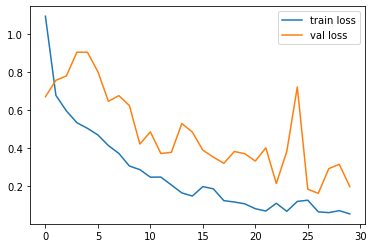

<Figure size 432x288 with 0 Axes>

In [47]:
#plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('Loss_Val_Loss')

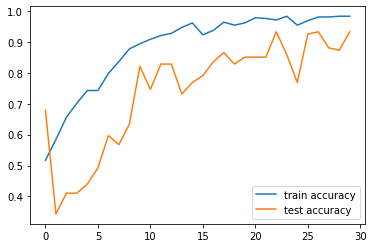

<Figure size 432x288 with 0 Axes>

In [48]:
#Plot the accuracy
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='test accuracy')
plt.legend()
plt.show()
plt.savefig('Accuracy')

In [53]:
#Save it as a h5 file
from tensorflow.keras.models import load_model
model.save('model_vgg19.h5')

In [54]:
y_pred=model.predict(test_set)
y_pred

array([[1.57584995e-02, 9.84241545e-01],
       [9.95231807e-01, 4.76813409e-03],
       [9.99995708e-01, 4.34746289e-06],
       [9.99996185e-01, 3.79614858e-06],
       [9.96920347e-01, 3.07964464e-03],
       [1.05320672e-02, 9.89467919e-01],
       [9.99998927e-01, 1.11815575e-06],
       [7.36138701e-01, 2.63861358e-01],
       [1.00000000e+00, 2.59137387e-08],
       [9.99935031e-01, 6.49915382e-05],
       [2.09480077e-01, 7.90519953e-01],
       [1.30485361e-02, 9.86951470e-01],
       [1.00000000e+00, 1.61033006e-10],
       [9.09357667e-01, 9.06423554e-02],
       [1.00000000e+00, 9.63553948e-09],
       [1.83881093e-02, 9.81611907e-01],
       [3.98118943e-02, 9.60188031e-01],
       [4.56878453e-01, 5.43121576e-01],
       [1.00000000e+00, 3.25901076e-14],
       [3.32688466e-02, 9.66731071e-01],
       [2.23463699e-02, 9.77653563e-01],
       [2.97428481e-02, 9.70257223e-01],
       [9.99964714e-01, 3.53183750e-05],
       [2.81712394e-02, 9.71828759e-01],
       [9.997304

In [55]:
import numpy as np
y_pred= np.argmax(y_pred, axis=1)
y_pred

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [56]:
#Lets do some testing, first load the model
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [57]:
model=load_model('model_vgg19.h5')

#load image to test
img= image.load_img('Dataset/Test/Uninfected/C3thin_original_IMG_20150608_163047_cell_22.png',target_size=(224,224))

In [59]:
x=image.img_to_array(img)
x
x.shape
x=x/255
x=np.expand_dims(x, axis=0)

In [20]:
print(x)

[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]


In [60]:
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [62]:
model.predict(img_data)

array([[0., 1.]], dtype=float32)

In [63]:
a=np.argmax(model.predict(img_data),axis=1)
print(a)

[1]


In [64]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Uninfected
